In [1]:
#   the jhu data extract of this code is based on the tutorial by B Chen which can be found at the following link
#   https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6 
#   the jhu data extract uses the following jhu csv files:
#   1  time_series_covid19_confirmed_global.csv................confirmed global Covid_19 cases
#   2  time_series_covid19_deaths_global.csv...................confirmed global Covid_19 deaths
#   3  time_series_covid19_recovered_global.csv................confirmed global Covid_19 recovered

#   import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from urllib.error import HTTPError
import numpy as np
import wget
import time
from datetime import datetime

#   the project uses urls / wget downloads in placee of the optional API component of this assignment as API calls are
#   not available for the datasets we needed

# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
[wget.download(url) for url in urls]



['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']

In [2]:
#   create dataframes from csv's

confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
    
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
    
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

confirmed_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,228932,231581,233120,234476,238383,243638,249193,254274,257948,259677


In [3]:
deaths_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,139,139,139,139,140,140,140,140,140,140
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,30766,31007,31214,31418,31632,31877,32168,32394,32610,32831
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4884,4884,4884,4907,4912,4919,4919,4919,4919,4919
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1982,1983,1983,1984,1984,1984,1984,1984,1984,1984
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3691,3697,3702,3709,3716,3726,3730,3734,3740,3743


In [4]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#   use melt() to unpivot DataFrames from current wide format into long format

dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
199355,NaN,Vietnam,14.058324,108.277199,1/2/22,1763040
199356,NaN,West Bank and Gaza,31.952200,35.233200,1/2/22,469748
199357,NaN,Yemen,15.552727,48.516388,1/2/22,10130
199358,NaN,Zambia,-13.133897,27.849332,1/2/22,259677


In [6]:
deaths_df_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
199355,NaN,Vietnam,14.058324,108.277199,1/2/22,32831
199356,NaN,West Bank and Gaza,31.952200,35.233200,1/2/22,4919
199357,NaN,Yemen,15.552727,48.516388,1/2/22,1984
199358,NaN,Zambia,-13.133897,27.849332,1/2/22,3743


In [7]:
recovered_df_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
188675,NaN,Vietnam,14.058324,108.277199,1/2/22,0
188676,NaN,West Bank and Gaza,31.952200,35.233200,1/2/22,0
188677,NaN,Yemen,15.552727,48.516388,1/2/22,0
188678,NaN,Zambia,-13.133897,27.849332,1/2/22,0


In [8]:
#   remove recovered data for Canada due to mismatch issue
#   Canada recovered data is counted by Country-wise rather than Province/State-wise

recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']


In [9]:
#    merge confirmed_df_long and deaths_df_long

full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
#    merge full_table and recovered_df_long

full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
199355,NaN,Vietnam,14.058324,108.277199,1/2/22,1763040,32831,0.0
199356,NaN,West Bank and Gaza,31.952200,35.233200,1/2/22,469748,4919,0.0
199357,NaN,Yemen,15.552727,48.516388,1/2/22,10130,1984,0.0
199358,NaN,Zambia,-13.133897,27.849332,1/2/22,259677,3743,0.0


In [10]:
#   data cleansing
#   1 converting date from string to datetime
#   2 replacing missing value NaN
#   3 coronavirus cases reported from 3 cruise ships should be treated differently

#   1 converting date from string to datetime
full_table['Date'] = pd.to_datetime(full_table['Date'])


In [11]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
199355,NaN,Vietnam,14.058324,108.277199,2022-01-02,1763040,32831,0.0
199356,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-02,469748,4919,0.0
199357,NaN,Yemen,15.552727,48.516388,2022-01-02,10130,1984,0.0
199358,NaN,Zambia,-13.133897,27.849332,2022-01-02,259677,3743,0.0


In [12]:
#   2 replacing missing values NaN
#   detect missing values NaN 
full_table.isna().sum()

Province/State    137416
Country/Region         0
Lat                 1424
Long                1424
Date                   0
Confirmed              0
Deaths                 0
Recovered          14952
dtype: int64

In [13]:
#   replace 'recovered' Nans with zero

full_table['Recovered'] = full_table['Recovered'].fillna(0)
full_table['Recovered']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
199355    0.0
199356    0.0
199357    0.0
199358    0.0
199359    0.0
Name: Recovered, Length: 199360, dtype: float64

In [14]:
#   3 coronavirus cases reported from 3 cruise ships should be treated differently
#   cases reported from cruise ships: Grand Princess, Diamond Princess and MS Zaandam need to be extracted and
#   treated differently due to Province/State and Country/Region mismatch over time

#   extract data for these ships 
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

#   remove data for these ships 
full_table = full_table[~(ship_rows)]

In [15]:
#    calculate active cases = confirmed - deaths - recovered

full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table

C:\Users\mikem\AppData\Local\Temp/ipykernel_6108/2677385167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
199355,NaN,Vietnam,14.058324,108.277199,2022-01-02,1763040,32831,0.0,1730209.0
199356,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-02,469748,4919,0.0,464829.0
199357,NaN,Yemen,15.552727,48.516388,2022-01-02,10130,1984,0.0,8146.0
199358,NaN,Zambia,-13.133897,27.849332,2022-01-02,259677,3743,0.0,255934.0


In [16]:
#   aggregate data into Country/Region and group by Date and Country/Region

full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_grouped

C:\Users\mikem\AppData\Local\Temp/ipykernel_6108/2747540925.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
138123,2022-01-02,Vietnam,1763040,32831,0.0,1730209.0
138124,2022-01-02,West Bank and Gaza,469748,4919,0.0,464829.0
138125,2022-01-02,Yemen,10130,1984,0.0,8146.0
138126,2022-01-02,Zambia,259677,3743,0.0,255934.0


In [17]:
#   calculate daily New cases, New deaths and New recovered by deducting the corresponding accumulative data on the previous day

#   new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

#   renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

#   merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

#   filling na with 0
full_grouped = full_grouped.fillna(0)

#   fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)


C:\Users\mikem\AppData\Local\Temp/ipykernel_6108/1381019722.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


In [18]:
#   final output is Country-wise data with: -
#   Confirmed, Deaths, Recovered and Active are cumulative data
#   New cases, New deaths and New Recovered are daily data
#   the DataFrame is ordered by Date and Country/Region
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
138123,2022-01-02,Vietnam,1763040,32831,0.0,1730209.0,16948,221,0
138124,2022-01-02,West Bank and Gaza,469748,4919,0.0,464829.0,0,0,0
138125,2022-01-02,Yemen,10130,1984,0.0,8146.0,3,0,0
138126,2022-01-02,Zambia,259677,3743,0.0,255934.0,1729,3,0


In [19]:
#   convert dataframe to a csv file for backup
full_grouped.to_csv('COVID-19-time-series-full-grouped.csv')


In [20]:
#   select Oz to check data
full_grouped_oz = full_grouped.loc[full_grouped["Country/Region"] == "Australia"]
full_grouped_oz

#   data is correct as at 02/01/2022

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
202,2020-01-23,Australia,0,0,0.0,0.0,0,0,0
396,2020-01-24,Australia,0,0,0.0,0.0,0,0,0
590,2020-01-25,Australia,0,0,0.0,0.0,0,0,0
784,2020-01-26,Australia,4,0,0.0,4.0,4,0,0
...,...,...,...,...,...,...,...,...,...
137166,2021-12-29,Australia,361322,2224,0.0,359098.0,21369,14,0
137360,2021-12-30,Australia,368596,2233,0.0,366363.0,7274,9,0
137554,2021-12-31,Australia,402949,2248,0.0,400701.0,34353,15,0
137748,2022-01-01,Australia,462955,2257,0.0,460698.0,60006,9,0


In [21]:
#   read the vaccination dataset - csv file into a dataframe
vacc_data_df = pd.read_csv('vaccine_data_global.csv')
vacc_data_df

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,Afghanistan,12/16/2021,5.228706e+06,4.397449e+06,3.566192e+06,12/16/2021,4.0
1,NaN,Albania,12/16/2021,2.216402e+06,1.108572e+06,9.983260e+05,12/16/2021,8.0
2,NaN,Algeria,12/16/2021,1.229306e+07,6.875003e+06,5.391232e+06,12/16/2021,12.0
3,NaN,Andorra,12/16/2021,1.064280e+05,5.609500e+04,5.033300e+04,12/16/2021,20.0
4,NaN,Angola,12/16/2021,1.031955e+07,7.003795e+06,3.315757e+06,12/16/2021,24.0
...,...,...,...,...,...,...,...,...
627,NaN,West Bank and Gaza,12/16/2021,3.184868e+06,NaN,NaN,12/16/2021,275.0
628,NaN,World,12/16/2021,8.551439e+09,4.386355e+09,3.601249e+09,12/16/2021,NaN
629,NaN,Yemen,12/16/2021,7.860270e+05,5.566520e+05,3.665870e+05,12/16/2021,887.0
630,NaN,Zambia,12/16/2021,1.283096e+06,8.066110e+05,8.549790e+05,12/16/2021,894.0


In [22]:
#   read the world population dataset - csv file into a dataframe
pop_data_df = pd.read_csv('world_population.csv')
pop_data_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [23]:
#   load "share-people-fully-vaccinated-covid"
percent_vaccinated_df = pd.read_csv('percent-people-fully-vaccinated.csv')
percent_vaccinated_df

,Country/Region,Code,Date,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,Afghanistan,AFG,5/11/2021,0.14,99.86,NaN
1,Afghanistan,AFG,5/20/2021,0.19,99.81,NaN
2,Afghanistan,AFG,5/24/2021,0.24,99.76,NaN
3,Afghanistan,AFG,5/26/2021,0.28,99.72,NaN
4,Afghanistan,AFG,5/27/2021,0.29,99.71,NaN
...,...,...,...,...,...,...
35692,Zimbabwe,ZWE,12/24/2021,20.57,79.43,NaN
35693,Zimbabwe,ZWE,12/25/2021,20.60,79.40,NaN
35694,Zimbabwe,ZWE,12/26/2021,20.62,79.38,NaN
35695,Zimbabwe,ZWE,12/27/2021,20.63,79.37,NaN


In [24]:
#   data cleansing'Country/Region].replace(['United States'], 'US')
percent_vaccinated_df['Country/Region'] = percent_vaccinated_df['Country/Region'].replace(['United States'],'US')


In [25]:
#   read the jhu_global_fatality csv file into a dataframe
jhu_global_fatality_df = pd.read_csv('jhu_global_fatality.csv')
jhu_global_fatality_df

,Country/Region,Case_Fatality,Deaths_per_100k
0,Peru,8.8,623.35
1,Bulgaria,4.2,442.82
2,Bosnia and Herzegovina,4.6,406.79
3,Hungary,3.1,400.25
4,Montenegro,1.4,386.89
...,...,...,...
179,New Zealand,0.4,1.04
180,Bhutan,0.1,0.39
181,China,4.2,0.35
182,Burundi,0.1,0.33


In [26]:
#   data cleansing'Country/Region].replace(['United States'], 'US')
jhu_global_fatality_df['Country/Region'] = jhu_global_fatality_df['Country/Region'].replace(['United States'],'US')


In [27]:
#   create a data frame for the selected countries of interest
countries_df = full_grouped[full_grouped['Country/Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
full_grouped.dropna(axis=1, how="all")
countries_df 


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
23,2020-01-22,Brazil,0,0,0.0,0.0,0,0,0
83,2020-01-22,Israel,0,0,0.0,0.0,0,0,0
84,2020-01-22,Italy,0,0,0.0,0.0,0,0,0
124,2020-01-22,New Zealand,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
138018,2022-01-02,Italy,6328076,137646,0.0,6190430.0,61137,133,0
138058,2022-01-02,New Zealand,14308,51,0.0,14257.0,51,0,0
138094,2022-01-02,South Africa,3472436,91228,0.0,3381208.0,4357,30,0
138114,2022-01-02,US,55106998,826060,0.0,54280938.0,248632,244,0


In [28]:
#   convert dataframe to a csv file for backup
countries_df.to_csv('Countries_Df.csv')


In [29]:
#   merge "countries_df" with "jhu_global_fatality_df" 
merged_inner1 = pd.merge(left=countries_df, right=jhu_global_fatality_df, left_on='Country/Region', right_on='Country/Region')
merged_inner1


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
1,2020-01-23,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
2,2020-01-24,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
3,2020-01-25,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
4,2020-01-26,Australia,4,0,0.0,4.0,4,0,0,0.6,8.80
...,...,...,...,...,...,...,...,...,...,...,...
5691,2021-12-29,United Kingdom,12630442,148557,0.0,12481885.0,223745,69,0,1.2,222.78
5692,2021-12-30,United Kingdom,12820685,148893,0.0,12671792.0,190243,336,0,1.2,222.78
5693,2021-12-31,United Kingdom,13011556,149096,0.0,12862460.0,190871,203,0,1.2,222.78
5694,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78


In [30]:
#   convert dataframe to a csv file for backup
merged_inner1.to_csv('merged_inner1.csv')


In [31]:
merged_inner2 = pd.merge(left=merged_inner1, right=percent_vaccinated_df, left_on='Country/Region', right_on='Country/Region')
merged_inner2


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k,Code,Date_y,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/23/2021,0.00,100.00,NaN
1,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/24/2021,0.00,100.00,NaN
2,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/25/2021,0.00,100.00,NaN
3,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/26/2021,0.00,100.00,NaN
4,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/27/2021,0.00,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837667,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/24/2021,69.30,30.70,NaN
1837668,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/25/2021,69.30,30.70,NaN
1837669,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/26/2021,69.31,30.69,NaN
1837670,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/27/2021,69.34,30.66,NaN


In [32]:
#   change "merged_inner2" to analysis dataframe
analysis_df = merged_inner2
analysis_df


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k,Code,Date_y,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/23/2021,0.00,100.00,NaN
1,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/24/2021,0.00,100.00,NaN
2,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/25/2021,0.00,100.00,NaN
3,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/26/2021,0.00,100.00,NaN
4,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/27/2021,0.00,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837667,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/24/2021,69.30,30.70,NaN
1837668,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/25/2021,69.30,30.70,NaN
1837669,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/26/2021,69.31,30.69,NaN
1837670,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/27/2021,69.34,30.66,NaN


In [33]:
#   replace Nans with 0
analysis_df.fillna(0)


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k,Code,Date_y,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/23/2021,0.00,100.00,0
1,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/24/2021,0.00,100.00,0
2,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/25/2021,0.00,100.00,0
3,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/26/2021,0.00,100.00,0
4,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/27/2021,0.00,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837667,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/24/2021,69.30,30.70,0
1837668,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/25/2021,69.30,30.70,0
1837669,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/26/2021,69.31,30.69,0
1837670,2022-01-02,United Kingdom,13309651,149324,0.0,13160327.0,135123,73,0,1.2,222.78,GBR,12/27/2021,69.34,30.66,0


In [34]:
#   NOTE THE FOLLOWING CODE HAS BEEN DISABLED AS IT RESULTS IN A CSV FILE OF 160MB. DESPITE EXTENSIVE SUPPORT FROM ASKBCS AND
#   UNINSTALLING / REINSTALLING GIT THIS ISSUE HAS YET TO BE RESOLVED
#   TO BE FOLLOWED UP WITH TUTORS / LECTURERS FOR SOLUTION

#   convert dataframe to a csv file for backup
#analysis_df.to_csv('analysis_df.csv')

In [35]:
#   ERIKA'S CODE & PLOTS START HERE

In [36]:
data = pd.read_csv("Analysis1.csv")
data


,FIPS,Admin2,Province_State,Country_Region,Date,Latitude,Longitude,Confirmed,Deaths,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,Afghanistan,1/12/2021 4:22,33.939110,67.709953,157289,7308,NaN,NaN,NaN
1,NaN,NaN,NaN,Afghanistan,3/11/2021 6:22,33.939110,67.709953,156307,7281,NaN,5776480.0,57020.0
2,NaN,NaN,NaN,Afghanistan,4/11/2021 4:22,33.939110,67.709953,156323,7284,NaN,NaN,NaN
3,NaN,NaN,NaN,Afghanistan,5/11/2021 4:21,33.939110,67.709953,156363,7284,NaN,NaN,NaN
4,NaN,NaN,NaN,Afghanistan,6/11/2021 4:21,33.939110,67.709953,156392,7284,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
119807,NaN,NaN,NaN,Zimbabwe,26/11/21 4:22,-19.015438,29.154857,133774,4704,NaN,NaN,NaN
119808,NaN,NaN,NaN,Zimbabwe,27/11/21 4:22,-19.015438,29.154857,133836,4704,NaN,NaN,NaN
119809,NaN,NaN,NaN,Zimbabwe,28/11/21 4:22,-19.015438,29.154857,133836,4704,NaN,NaN,NaN
119810,NaN,NaN,NaN,Zimbabwe,29/11/21 4:22,-19.015438,29.154857,133951,4705,NaN,NaN,NaN


In [47]:
df = data[data['Country_Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
df.dropna(axis=1, how="all")


,FIPS,Admin2,Province_State,Country_Region,Date,Latitude,Longitude,Confirmed,Deaths
232,NaN,NaN,Australian Capital Territory,Australia,1/12/2021 4:22,-35.473500,149.012400,2134,14
233,NaN,NaN,New South Wales,Australia,1/12/2021 4:22,-33.868800,151.209300,81916,628
234,NaN,NaN,Northern Territory,Australia,1/12/2021 4:22,-12.463400,130.845600,292,0
235,NaN,NaN,Queensland,Australia,1/12/2021 4:22,-27.469800,153.025100,2130,7
236,NaN,NaN,South Australia,Australia,1/12/2021 4:22,-34.928500,138.600700,932,4
...,...,...,...,...,...,...,...,...,...
119567,56039.0,Teton,Wyoming,US,30/11/21 4:22,43.935225,-110.589080,5377,14
119568,56041.0,Uinta,Wyoming,US,30/11/21 4:22,41.287818,-110.547578,4033,30
119569,90056.0,Unassigned,Wyoming,US,30/11/21 4:22,NaN,NaN,0,0
119570,56043.0,Washakie,Wyoming,US,30/11/21 4:22,43.904516,-107.680187,1861,35


In [48]:
df = data[data['Country_Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
df.dropna(axis=1, how="all")


,FIPS,Admin2,Province_State,Country_Region,Date,Latitude,Longitude,Confirmed,Deaths
232,NaN,NaN,Australian Capital Territory,Australia,1/12/2021 4:22,-35.473500,149.012400,2134,14
233,NaN,NaN,New South Wales,Australia,1/12/2021 4:22,-33.868800,151.209300,81916,628
234,NaN,NaN,Northern Territory,Australia,1/12/2021 4:22,-12.463400,130.845600,292,0
235,NaN,NaN,Queensland,Australia,1/12/2021 4:22,-27.469800,153.025100,2130,7
236,NaN,NaN,South Australia,Australia,1/12/2021 4:22,-34.928500,138.600700,932,4
...,...,...,...,...,...,...,...,...,...
119567,56039.0,Teton,Wyoming,US,30/11/21 4:22,43.935225,-110.589080,5377,14
119568,56041.0,Uinta,Wyoming,US,30/11/21 4:22,41.287818,-110.547578,4033,30
119569,90056.0,Unassigned,Wyoming,US,30/11/21 4:22,NaN,NaN,0,0
119570,56043.0,Washakie,Wyoming,US,30/11/21 4:22,43.904516,-107.680187,1861,35


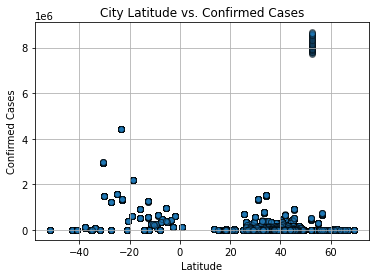

In [49]:
plt.scatter(df['Latitude'],df['Confirmed'],alpha=0.5,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Confirmed Cases')
plt.title('City Latitude vs. Confirmed Cases')
plt.grid()


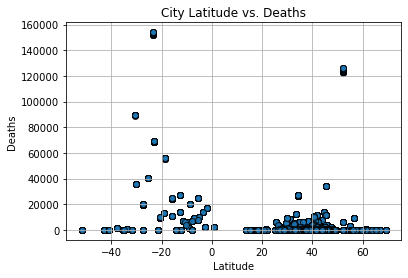

In [50]:
plt.scatter(df['Latitude'],df['Deaths'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.title('City Latitude vs. Deaths')
plt.grid()


Text(0, 100000, 'y = nanx nan')

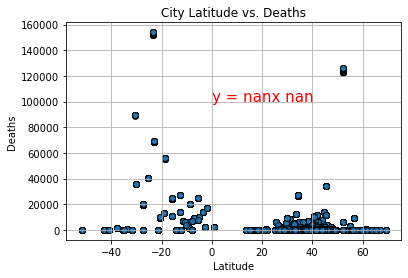

In [51]:
plt.scatter(df['Latitude'],df['Deaths'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.title('City Latitude vs. Deaths')
plt.grid()

x_values = df['Latitude']
y_values = df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100000),fontsize=15,color="red")


In [52]:
data = pd.read_csv("vaccine_data_global.csv")
data


,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,Afghanistan,12/16/2021,5.228706e+06,4.397449e+06,3.566192e+06,12/16/2021,4.0
1,NaN,Albania,12/16/2021,2.216402e+06,1.108572e+06,9.983260e+05,12/16/2021,8.0
2,NaN,Algeria,12/16/2021,1.229306e+07,6.875003e+06,5.391232e+06,12/16/2021,12.0
3,NaN,Andorra,12/16/2021,1.064280e+05,5.609500e+04,5.033300e+04,12/16/2021,20.0
4,NaN,Angola,12/16/2021,1.031955e+07,7.003795e+06,3.315757e+06,12/16/2021,24.0
...,...,...,...,...,...,...,...,...
627,NaN,West Bank and Gaza,12/16/2021,3.184868e+06,NaN,NaN,12/16/2021,275.0
628,NaN,World,12/16/2021,8.551439e+09,4.386355e+09,3.601249e+09,12/16/2021,NaN
629,NaN,Yemen,12/16/2021,7.860270e+05,5.566520e+05,3.665870e+05,12/16/2021,887.0
630,NaN,Zambia,12/16/2021,1.283096e+06,8.066110e+05,8.549790e+05,12/16/2021,894.0


In [54]:
df = data[data['Country_Region'].isin(["Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa", "Vietnam"])]
df


,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
32,NaN,Australia,12/16/2021,40688890.0,20249293.0,19375276.0,12/16/2021,36.0
33,Australian Capital Territory,Australia,12/16/2021,993517.0,NaN,NaN,12/16/2021,3601.0
34,New South Wales,Australia,12/16/2021,13194149.0,NaN,NaN,12/16/2021,3602.0
35,Northern Territory,Australia,12/16/2021,402806.0,NaN,NaN,12/16/2021,3603.0
36,Queensland,Australia,12/16/2021,7712811.0,NaN,NaN,12/16/2021,3604.0
37,South Australia,Australia,12/16/2021,2724109.0,NaN,NaN,12/16/2021,3605.0
38,Tasmania,Australia,12/16/2021,890683.0,NaN,NaN,12/16/2021,3606.0
39,Unknown,Australia,12/16/2021,0.0,NaN,NaN,12/16/2021,3609.0
40,Victoria,Australia,12/16/2021,10922708.0,NaN,NaN,12/16/2021,3607.0
41,Western Australia,Australia,12/16/2021,3848107.0,NaN,NaN,12/16/2021,3608.0


In [55]:
Country_Vaccination = pd.DataFrame(df.groupby('Country_Region')['People_fully_vaccinated'].agg('sum'))
Country_Vaccination.to_csv("Country Vaccination.csv")


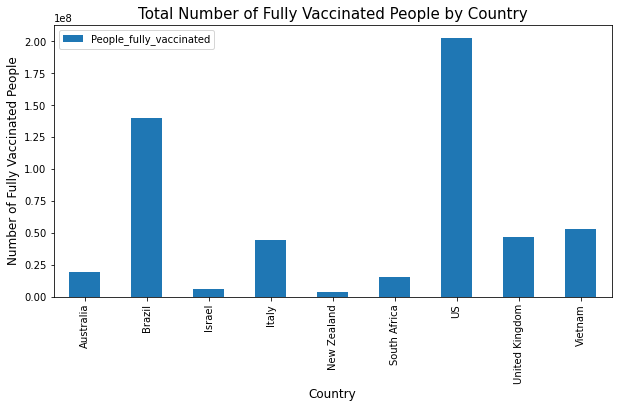

In [56]:
Bar_Pandas = Country_Vaccination.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Fully Vaccinated People", fontsize=12)
plt.title("Total Number of Fully Vaccinated People by Country", fontsize=15)
plt.savefig("Total Number of Fully Vaccinated People by Country.png")


In [57]:
world_pop = pd.read_csv("world_population.csv")
us_df = world_pop[world_pop["Country Name"] == "United States"]
us_df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
251,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,329484123.0


In [59]:
world_pop = pd.read_csv("world_population.csv")
world_df = world_pop[world_pop["Country Name"].isin(["Australia","United States","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa", "Vietnam"])]
world_df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
13,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,...,22340024.0,22733465.0,23128129.0,23475686.0,23815995.0,24190907.0,24601860.0,24982688.0,25365745.0,25687041.0
29,Brazil,BRA,"Population, total",SP.POP.TOTL,72179235.0,74311338.0,76514329.0,78772647.0,81064572.0,83373533.0,...,197514541.0,199287292.0,201035904.0,202763744.0,204471759.0,206163056.0,207833825.0,209469320.0,211049519.0,212559409.0
81,United Kingdom,GBR,"Population, total",SP.POP.TOTL,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,...,63258810.0,63700215.0,64128273.0,64602298.0,65116219.0,65611593.0,66058859.0,66460344.0,66836327.0,67215293.0
115,Israel,ISR,"Population, total",SP.POP.TOTL,2114020.0,2185000.0,2293000.0,2379000.0,2475000.0,2563000.0,...,7765800.0,7910500.0,8059500.0,8215700.0,8380100.0,8546000.0,8713300.0,8882800.0,9054000.0,9216900.0
116,Italy,ITA,"Population, total",SP.POP.TOTL,50199700.0,50536350.0,50879450.0,51252000.0,51675350.0,52112350.0,...,59379449.0,59539717.0,60233948.0,60789140.0,60730582.0,60627498.0,60536709.0,60421760.0,59729081.0,59554023.0
180,New Zealand,NZL,"Population, total",SP.POP.TOTL,2371800.0,2419700.0,2482000.0,2531800.0,2585400.0,2628400.0,...,4384000.0,4408100.0,4442100.0,4516500.0,4609400.0,4714100.0,4813600.0,4900600.0,4979300.0,5084300.0
251,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,329484123.0
257,Vietnam,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,88871384.0,89801926.0,90752593.0,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0


In [60]:
World_Pop1 = pd.DataFrame(world_df.groupby('Country Name')['2020'].agg('sum'))
World_Pop = World_Pop1.rename(columns={'2020': 'Population'},index={'United States': 'US'})
World_Pop


,Population
Country Name,
Australia,25687041.0
Brazil,212559409.0
Israel,9216900.0
Italy,59554023.0
New Zealand,5084300.0
South Africa,59308690.0
United Kingdom,67215293.0
US,329484123.0
Vietnam,97338583.0


In [63]:
frames = [Country_Vaccination, World_Pop]
df = pd.concat(frames, axis=1)
df['Percentage_Vacc'] = (df['People_fully_vaccinated'] / df['Population'])
df['Percentage_Vacc'] = df['Percentage_Vacc'].apply(lambda x: x*100)
df.style.format({'Percentage_Vacc': "{:.2%}"})
df.to_csv('Country Vaccination.csv', index=False)


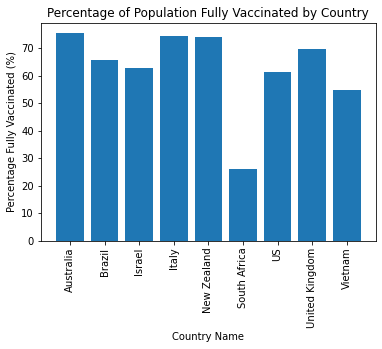

In [65]:
xaxis = ["Australia", "Brazil", "Israel", "Italy", "New Zealand", "South Africa", "US", "United Kingdom", "Vietnam"]
yaxis = df["Percentage_Vacc"]
plt.xticks(rotation=90)
ax = plt.bar(xaxis, yaxis)
plt.xlabel("Country Name")
plt.ylabel("Percentage Fully Vaccinated (%)")
plt.title("Percentage of Population Fully Vaccinated by Country")
plt.savefig("Percentage of Population Fully Vaccinated by Country.png")

#label = df['Percentage_Vacc']
#plt.annotate(
    #list(label),                      # Use `label` as label
    #(xaxis, yaxis),         # Place label at end of the bar
    #xytext=(5, 0),          # Horizontally shift label by `space`
    #textcoords="offset points", # Interpret `xytext` as offset in points
    #va='center',                # Vertically center label
    #ha='left') 


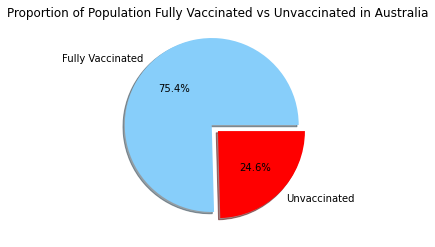

In [66]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [19375276, (25687041-19375276)]
colors = ["lightskyblue", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Australia")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Australia.png")


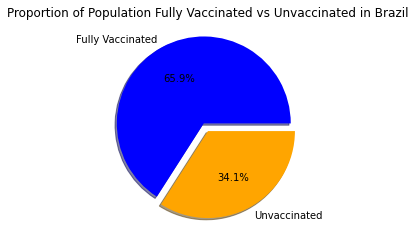

In [67]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [140151965, (212559409-140151965)]
colors = ["blue", "orange"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Brazil")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Brazil.png")


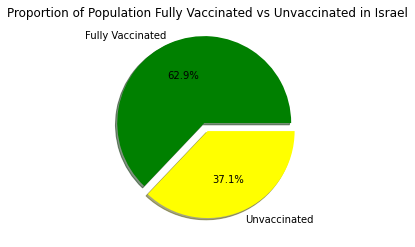

In [68]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [5798867, (9216900-5798867)]
colors = ["green", "yellow"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Israel")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Israel.png")


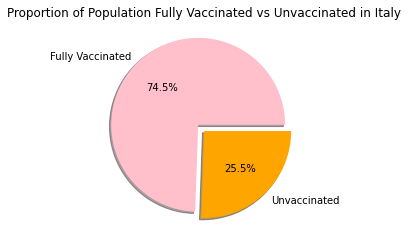

In [69]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [44343143, (59554023-44343143)]
colors = ["pink", "orange"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Italy")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Italy.png")


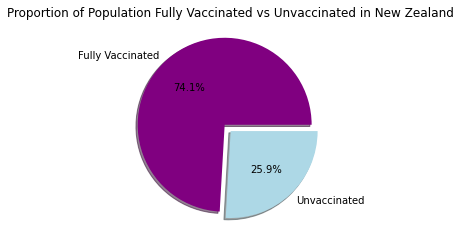

In [70]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [3766864, (5084300-3766864)]
colors = ["purple", "lightblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in New Zealand")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in New Zealand.png")


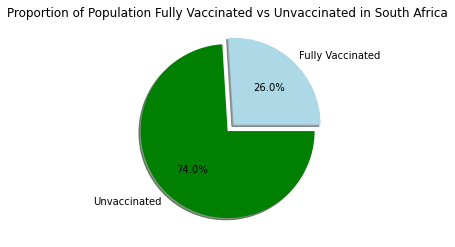

In [71]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [15410168, (59308690-15410168)]
colors = ["lightblue", "green"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in South Africa")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in South Africa.png")


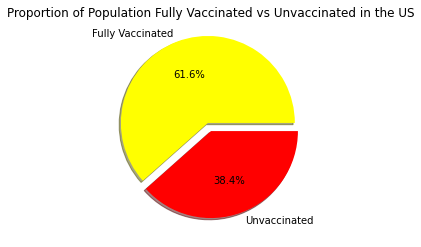

In [72]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [202845886, (329484123-202845886)]
colors = ["yellow", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in the US")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in US.png")


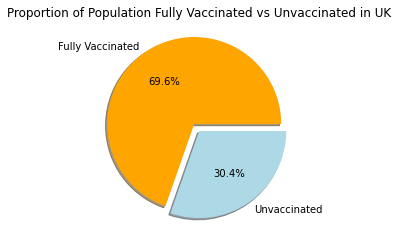

In [73]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [46804609, (67215293-46804609)]
colors = ["orange", "lightblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in UK")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in UK.png")


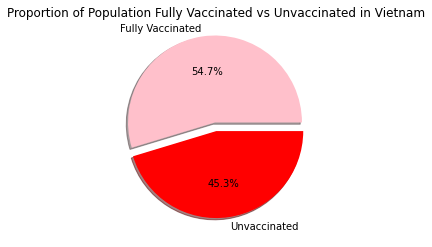

In [74]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [53224715, (97338583-53224715)]
colors = ["pink", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Vietnam")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Vietnam.png")


In [76]:
death_df = pd.read_csv("Country Death.csv")
death_df.set_index("Country_Region", inplace = True)
death_df


,Deaths
Country_Region,
Australia,57020
Brazil,18342121
Israel,244472
Italy,3987145
New Zealand,1077
South Africa,2685302
US,22980649
United Kingdom,4304969
Vietnam,701736


In [77]:
df.to_csv("Percentage Vaccinated.csv")

In [78]:
frames = [death_df, df]
df1 = pd.concat(frames, axis=1)
df_clean = df1.loc[:,~df1.columns.duplicated()]
df_clean


,Deaths,People_fully_vaccinated,Population,Percentage_Vacc
Australia,57020,19375276.0,25687041.0,75.428213
Brazil,18342121,140151965.0,212559409.0,65.935432
Israel,244472,5798867.0,9216900.0,62.915590
Italy,3987145,44343143.0,59554023.0,74.458686
New Zealand,1077,3766864.0,5084300.0,74.088154
South Africa,2685302,15410168.0,59308690.0,25.982985
US,22980649,202845886.0,329484123.0,61.564692
United Kingdom,4304969,46804609.0,67215293.0,69.633869
Vietnam,701736,53224715.0,97338583.0,54.679977


In [81]:
df_clean['Percentage_Death'] = ((df_clean['Deaths'] / df_clean['Population'])*100 )
#df_clean['Percentage_Death'] = df_clean['Percentage_Death'].apply(lambda x: x*100)
#df_clean.style.format({'Percentage_Death': "{:.2%}"})
df_clean


,Deaths,People_fully_vaccinated,Population,Percentage_Vacc,Percentage_Death
Australia,57020,19375276.0,25687041.0,75.428213,0.221980
Brazil,18342121,140151965.0,212559409.0,65.935432,8.629174
Israel,244472,5798867.0,9216900.0,62.915590,2.652432
Italy,3987145,44343143.0,59554023.0,74.458686,6.695005
New Zealand,1077,3766864.0,5084300.0,74.088154,0.021183
South Africa,2685302,15410168.0,59308690.0,25.982985,4.527670
US,22980649,202845886.0,329484123.0,61.564692,6.974736
United Kingdom,4304969,46804609.0,67215293.0,69.633869,6.404746
Vietnam,701736,53224715.0,97338583.0,54.679977,0.720923


The r-squared value is: 0.004392785966535406
The correlation between Percentage of Population Death and Vaccinated is: -0.0662780956767423


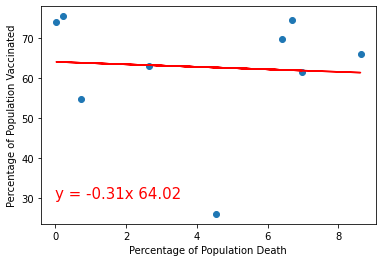

In [82]:
x_axis = df_clean["Percentage_Death"]
y_axis = df_clean["Percentage_Vacc"]
plt.xlabel("Percentage of Population Death")
plt.ylabel("Percentage of Population Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between Percentage of Population Death and Vaccinated is: {rvalue}")



In [95]:
Country_Vaccination1 = pd.DataFrame(data.groupby('Country_Region')['People_fully_vaccinated'].agg('sum'))
Country_Vaccination1


KeyError: 'Column not found: People_fully_vaccinated'

In [84]:
world_pop
#world_pop.set_index("Country Name", inplace = True)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [85]:
frames = [world_pop, Country_Vaccination1]
World_Pop_Vacc = pd.concat(frames, axis=1)
World = World_Pop_Vacc.dropna()
World


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated


In [87]:
World['Percentage_Vacc'] = ((World['People_fully_vaccinated'] / World['2020'])*100 )
World


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc


In [96]:
World.index.name = 'Country Name'
World
Percentage_Vaccinated = pd.DataFrame(World.groupby('Country Name')['Percentage_Vacc'].agg('sum'))
Percentage_Vaccinated

ValueError: 'Country Name' is both an index level and a column label, which is ambiguous.

In [97]:
data = pd.read_csv("Analysis1.csv")
World_Death = pd.DataFrame(data.groupby('Country_Region')['Deaths'].agg('sum'))
World_Death


,Deaths
Country_Region,
Afghanistan,211585
Albania,87328
Algeria,173859
Andorra,3777
Angola,50068
...,...
Vietnam,701736
West Bank and Gaza,142476
Yemen,57757


In [98]:
frames = [World_Death, Percentage_Vaccinated]
World_Population_Vacc = pd.concat(frames, axis=1)
World_total = World_Population_Vacc.dropna()
World_total


NameError: name 'Percentage_Vaccinated' is not defined

In [99]:
frames = [World_Death, Percentage_Vaccinated]
World_Population_Vacc = pd.concat(frames, axis=1)
World_total = World_Population_Vacc.dropna()
World_total


NameError: name 'Percentage_Vaccinated' is not defined

In [100]:
World_total1['Percentage_Deaths'] = ((World_total1['Deaths'] / World_total1['2020'])*100 )
World_total1


NameError: name 'World_total1' is not defined

In [101]:
World_Population_Vaccination = World_total1[["Percentage_Vacc", "Percentage_Deaths"]]
World_Population_Vaccination.to_csv('World Population Vaccination.csv')


NameError: name 'World_total1' is not defined

In [102]:
x_axis = World_Population_Vaccination["Percentage_Deaths"]
y_axis = World_Population_Vaccination["Percentage_Vacc"]
plt.xlabel("Percentage of Population Deaths")
plt.ylabel("Percentage of Population Vaccinated")
plt.title("Percentage of Population Deaths vs Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(11,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between the Percentage of Deaths and Population Vaccinated is: {rvalue}")
plt.savefig("Percentage of Population Deaths vs Vaccinated.png")

NameError: name 'World_Population_Vaccination' is not defined

In [104]:
df = pd.read_csv("Incident Rate.csv")
df


,Unnamed: 0,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,8,NaN,NaN,Australian Capital Territory,Australia,2021-11-02 04:22:03,-35.473500,149.012400,1788,13,NaN,NaN,"Australian Capital Territory, Australia",417.659425,0.727069
1,9,NaN,NaN,New South Wales,Australia,2021-11-02 04:22:03,-33.868800,151.209300,75578,576,NaN,NaN,"New South Wales, Australia",930.992855,0.762127
2,10,NaN,NaN,Northern Territory,Australia,2021-11-02 04:22:03,-12.463400,130.845600,225,0,NaN,NaN,"Northern Territory, Australia",91.612378,0.000000
3,11,NaN,NaN,Queensland,Australia,2021-11-02 04:22:03,-27.469800,153.025100,2090,7,NaN,NaN,"Queensland, Australia",40.856221,0.334928
4,12,NaN,NaN,South Australia,Australia,2021-11-02 04:22:03,-34.928500,138.600700,918,4,NaN,NaN,"South Australia, Australia",52.263023,0.435730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100675,120167,NaN,NaN,Scotland,United Kingdom,2021-12-01 04:22:29,56.490700,-4.202600,727549,9572,NaN,NaN,"Scotland, United Kingdom",13317.024509,1.315650
100676,120168,NaN,NaN,Turks and Caicos Islands,United Kingdom,2021-12-01 04:22:29,21.694000,-71.797900,3096,24,NaN,NaN,"Turks and Caicos Islands, United Kingdom",7996.280800,0.775194
100677,120169,NaN,NaN,Unknown,United Kingdom,2021-12-01 04:22:29,NaN,NaN,0,0,NaN,NaN,"Unknown, United Kingdom",NaN,NaN
100678,120170,NaN,NaN,Wales,United Kingdom,2021-12-01 04:22:29,52.130700,-3.783700,508932,6405,NaN,NaN,"Wales, United Kingdom",16215.255209,1.258518


In [113]:
IR = pd.DataFrame(df.groupby('Country_Region')['Incident_Rate'].agg('sum'))
IR.index.name = 'Country Name'
IR


,Incident_Rate
Country Name,
Australia,9.991261e+04
Brazil,9.650690e+06
Israel,4.636041e+05
Italy,5.057224e+06
New Zealand,5.886673e+03
South Africa,1.484085e+05
US,1.460918e+09
United Kingdom,4.277304e+06
Vietnam,3.258448e+04


In [114]:
Vacc = pd.read_csv("Percentage Vaccinated.csv")
Vacc.set_index("Unnamed: 0", inplace = True)
Vacc.index.name = 'Country Name'
Vacc


,People_fully_vaccinated,Population,Percentage_Vacc
Country Name,,,
Australia,19375276.0,25687041.0,75.428213
Brazil,140151965.0,212559409.0,65.935432
Israel,5798867.0,9216900.0,62.915590
Italy,44343143.0,59554023.0,74.458686
New Zealand,3766864.0,5084300.0,74.088154
South Africa,15410168.0,59308690.0,25.982985
US,202845886.0,329484123.0,61.564692
United Kingdom,46804609.0,67215293.0,69.633869
Vietnam,53224715.0,97338583.0,54.679977


In [115]:
frames = [Vacc, IR]
World_Vacc = pd.concat(frames, axis=1)
World_Vacc



,People_fully_vaccinated,Population,Percentage_Vacc,Incident_Rate
Country Name,,,,
Australia,19375276.0,25687041.0,75.428213,9.991261e+04
Brazil,140151965.0,212559409.0,65.935432,9.650690e+06
Israel,5798867.0,9216900.0,62.915590,4.636041e+05
Italy,44343143.0,59554023.0,74.458686,5.057224e+06
New Zealand,3766864.0,5084300.0,74.088154,5.886673e+03
South Africa,15410168.0,59308690.0,25.982985,1.484085e+05
US,202845886.0,329484123.0,61.564692,1.460918e+09
United Kingdom,46804609.0,67215293.0,69.633869,4.277304e+06
Vietnam,53224715.0,97338583.0,54.679977,3.258448e+04


The r-squared value is: 0.000717323472111553
The correlation between the Incident Rate and Population Vaccinated is: -0.026782895140584653


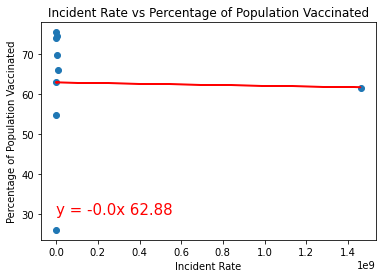

In [116]:
x_axis = World_Vacc["Incident_Rate"]
y_axis = World_Vacc["Percentage_Vacc"]
plt.xlabel("Incident Rate")
plt.ylabel("Percentage of Population Vaccinated")
plt.title("Incident Rate vs Percentage of Population Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(11,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between the Incident Rate and Population Vaccinated is: {rvalue}")
plt.savefig("Incident Rate vs Population Vaccinated.png")

In [117]:
jhu_df = pd.read_csv('jhu_data.csv')
jhu_df


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,11/2/2021 4:22,33.939110,67.709953,156284,7281,NaN,NaN,Afghanistan,401.465863,4.658826
1,NaN,NaN,NaN,Albania,11/2/2021 4:22,41.153300,20.168300,185497,2931,NaN,NaN,Albania,6445.791924,1.580079
2,NaN,NaN,NaN,Algeria,11/2/2021 4:22,28.033900,1.659600,206566,5924,NaN,NaN,Algeria,471.062912,2.867849
3,NaN,NaN,NaN,Andorra,11/2/2021 4:22,42.506300,1.521800,15516,130,NaN,NaN,Andorra,20081.537570,0.837845
4,NaN,NaN,NaN,Angola,11/2/2021 4:22,-11.202700,17.873900,64458,1713,NaN,NaN,Angola,196.122054,2.657544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120175,NaN,NaN,NaN,Vietnam,12/1/2021 4:22,14.058324,108.277199,1238082,25252,NaN,NaN,Vietnam,1271.933453,2.039606
120176,NaN,NaN,NaN,West Bank and Gaza,12/1/2021 4:22,31.952200,35.233200,460053,4796,NaN,NaN,West Bank and Gaza,9018.143198,1.042489
120177,NaN,NaN,NaN,Yemen,12/1/2021 4:22,15.552727,48.516388,10004,1950,NaN,NaN,Yemen,33.541242,19.492203
120178,NaN,NaN,NaN,Zambia,12/1/2021 4:22,-13.133897,27.849332,210169,3667,NaN,NaN,Zambia,1143.219664,1.744786


In [118]:
IR_world = pd.DataFrame(jhu_df.groupby('Country_Region')['Incident_Rate'].agg('sum'))
IR_world.index.name = 'Country Name'
IR_world


,Incident_Rate
Country Name,
Afghanistan,12076.587081
Albania,201594.725136
Algeria,14251.674698
Andorra,622714.036140
Angola,5923.091116
...,...
Vietnam,32584.480916
West Bank and Gaza,268830.144411
Yemen,997.801647


In [119]:
Vacc_df = pd.read_csv("World Vaccinated.csv")
Vacc_df.set_index("Unnamed: 0", inplace = True)
Vacc_df.index.name = 'Country Name'
Vacc_df


,Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,211585.0,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0,9.160914
Albania,87328.0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0,35.180282
Algeria,173859.0,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,5391232.0,12.294421
Andorra,3777.0,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0,65.143338
Angola,50068.0,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0,10.088633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,40848.0,UZB,"Population, total",SP.POP.TOTL,8526299.0,8813619.0,9113629.0,9428906.0,9762819.0,10116870.0,...,30243200.0,30757700.0,31298900.0,31847900.0,32388600.0,32956100.0,33580350.0,34232050.0,5882086.0,17.182979
Vanuatu,30.0,VUT,"Population, total",SP.POP.TOTL,63689.0,65700.0,67793.0,69944.0,72116.0,74268.0,...,256637.0,263888.0,271128.0,278326.0,285499.0,292675.0,299882.0,307150.0,47345.0,15.414293
Vietnam,701736.0,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,90752593.0,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0,53224715.0,54.679977


In [120]:
frames = [Vacc_df, IR_world]
World_df = pd.concat(frames, axis=1)
World_df_total = World_df.dropna()
World_df_total


,Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc,Incident_Rate
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,211585.0,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0,9.160914,12076.587081
Albania,87328.0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0,35.180282,201594.725136
Algeria,173859.0,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,5391232.0,12.294421,14251.674698
Andorra,3777.0,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0,65.143338,622714.036140
Angola,50068.0,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0,10.088633,5923.091116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,40848.0,UZB,"Population, total",SP.POP.TOTL,8526299.0,8813619.0,9113629.0,9428906.0,9762819.0,10116870.0,...,30757700.0,31298900.0,31847900.0,32388600.0,32956100.0,33580350.0,34232050.0,5882086.0,17.182979,17024.826319
Vanuatu,30.0,VUT,"Population, total",SP.POP.TOTL,63689.0,65700.0,67793.0,69944.0,72116.0,74268.0,...,263888.0,271128.0,278326.0,285499.0,292675.0,299882.0,307150.0,47345.0,15.414293,61.500615
Vietnam,701736.0,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0,53224715.0,54.679977,32584.480916


The r-squared value is: 0.10643894323245165
The correlation between the Incident Rate and Population Vaccinated is: 0.3262498172144341


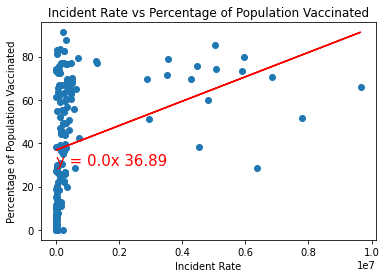

In [121]:
x_axis = World_df_total["Incident_Rate"]
y_axis = World_df_total["Percentage_Vacc"]
plt.xlabel("Incident Rate")
plt.ylabel("Percentage of Population Vaccinated")
plt.title("Incident Rate vs Percentage of Population Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(11,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between the Incident Rate and Population Vaccinated is: {rvalue}")
plt.savefig("Incident Rate vs Population Vaccinated.png")


In [ ]:
#   JOHN'S CODE STARTS HERE

In [ ]:
#   MIKE'S CODE STARTS HERE

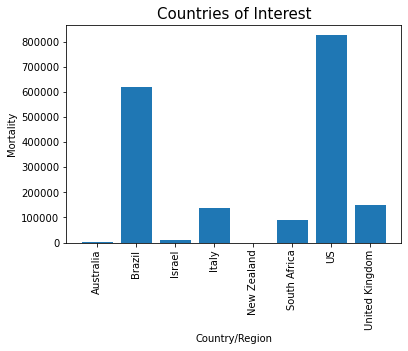

Country/Region
Australia           2266
Brazil            619401
Israel              8244
Italy             137646
New Zealand           51
South Africa       91228
US                826060
United Kingdom    149324
Name: Deaths, dtype: int64

<Figure size 432x288 with 0 Axes>

In [37]:
#   plot mortality for selected countries of interest using pyplot
mortality = analysis_df.groupby(["Country/Region"]).max()["Deaths"]
plt.bar(mortality.index.values,mortality.values)
plt.xlabel("Country/Region")
plt.xticks(rotation = 90)
plt.ylabel("Mortality")
plt.title("Countries of Interest", fontsize=15)
plt.show()
#   save as a png
plt.savefig("Mortality.png")
mortality

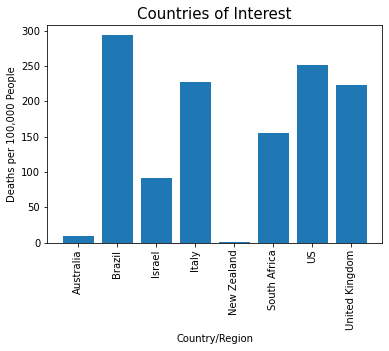

Country/Region
Australia           2266
Brazil            619401
Israel              8244
Italy             137646
New Zealand           51
South Africa       91228
US                826060
United Kingdom    149324
Name: Deaths, dtype: int64

<Figure size 432x288 with 0 Axes>

In [38]:
#   plot "deaths per 100,000 people" for selected countries of interest using pyplot
Deaths_per_100k = analysis_df.groupby(["Country/Region"]).max()["Deaths_per_100k"]
plt.bar(Deaths_per_100k.index.values,Deaths_per_100k.values)
plt.xlabel("Country/Region")
plt.xticks(rotation = 90)
plt.ylabel("Deaths per 100,000 People")
plt.title("Countries of Interest", fontsize=15)
plt.show()
#   save as a png
plt.savefig("Deaths_per_100k_People.png")
mortality

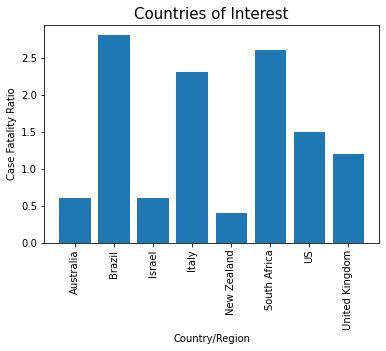

Country/Region
Australia           2266
Brazil            619401
Israel              8244
Italy             137646
New Zealand           51
South Africa       91228
US                826060
United Kingdom    149324
Name: Deaths, dtype: int64

<Figure size 432x288 with 0 Axes>

In [39]:
#   plot "case fatality ratio" for selected countries of interest using pyplot
Case_Fatality = analysis_df.groupby(["Country/Region"]).max()["Case_Fatality"]
plt.bar(Case_Fatality.index.values,Case_Fatality.values)
plt.xlabel("Country/Region")
plt.xticks(rotation = 90)
plt.ylabel("Case Fatality Ratio")
plt.title("Countries of Interest", fontsize=15)
plt.show()
#   save as a png
plt.savefig("Case_Fatality_Ratio.png")
mortality

In [40]:
#   when I run following code it results in "key error" and says it cannot find "Case_Fatality"
#   when I comment out the "get the latest vaccinated / case fatality ratios" code it works fine
#   the "Case_Fatality" reference works fine in the above:
#       "plot "case fatality ratio" for selected countries of interest using pyplot" code
#   I'm afraid I haven't a clue why
#   Help - anyone!

#   regression analysis: "Number of Fully Vaccinated per 100 People versus Case Fatality Ratio"

#   get the latest vaccinated / case fatality ratios
vacc_cfr_analysis_df = analysis_df.groupby(["Country/Region"]).max()["Case_Fatality"]
vacc_cfr_analysis_df

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = vacc_cfr_analysis_df["Case_Fatality"]
y_values = vacc_cfr_analysis_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 0.7
regEQplotY = 72
#label the axes
x_label = "Case Fatality Ratio"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Case Fatality Ratio')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Case Fatality Ratio.png")
plt.show()  

KeyError: 'Case_Fatality'

In [ ]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Deaths per 100k People"

#   get the latest vaccinated / Deaths per 100k People data
vacc_deaths_per_100k_analysis_df = analysis_df.groupby(["Country/Region"]).max()["Deaths_per_100k"]

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = vacc_deaths_per_100k_analysis_df["Deaths_per_100k"]
y_values = vacc_deaths_per_100k_analysis_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 50
regEQplotY = 72
#label the axes
x_label = "Deaths per 100k"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Deaths per 100k')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths per 100k.png")
plt.show()  

In [ ]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Deaths"   ***   ISSUES   ***

#   get the latest vaccinated / Deaths per 100k People data
vacc_deaths_analysis_df = analysis_df.groupby(["Country/Region"]).max()["Deaths"]

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = analysis_df["Deaths"]
y_values = analysis_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 300000
regEQplotY = 70
#label the axes
x_label = "Deaths"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Deaths')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths.png")
plt.show()  

The correlation between people fully vaccinated per hundred and deaths is -0.0


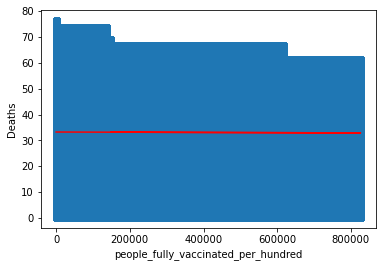

<Figure size 432x288 with 0 Axes>

In [41]:
#   Calculate the correlation coefficient

#   get the latest data for people_fully_vaccinated_per_hundred and deaths for selected countries
#analysis_df = analysis_df.groupby(["Country/Region"]).max()["Deaths"]

#   for people_fully_vaccinated_per_hundred and deaths for selected countries
corr=round(st.pearsonr(analysis_df['Deaths'],analysis_df['people_fully_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people fully vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Deaths'],analysis_df['people_fully_vaccinated_per_hundred'])

y_values = analysis_df['Deaths']*model[0]+model[1]
plt.scatter(analysis_df['Deaths'],analysis_df['people_fully_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths'],y_values,color="red")
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Deaths')
plt.show()

#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths.png")

#   the pearson's correlation coefficient 0f -0.00 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people fully vaccinated per hundred and deaths is -0.15


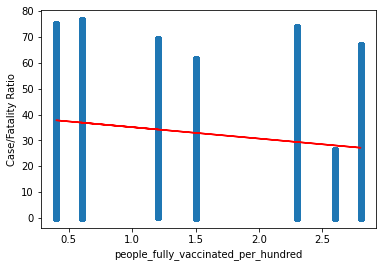

<Figure size 432x288 with 0 Axes>

In [42]:
#   Calculate the correlation coefficient
#   for people_fully_vaccinated_per_hundred and case-fatality_ratio for selected countries
corr=round(st.pearsonr(analysis_df['Case_Fatality'],analysis_df['people_fully_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people fully vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Case_Fatality'],analysis_df['people_fully_vaccinated_per_hundred'])

y_values = analysis_df['Case_Fatality']*model[0]+model[1]
plt.scatter(analysis_df['Case_Fatality'],analysis_df['people_fully_vaccinated_per_hundred'])
plt.plot(analysis_df['Case_Fatality'],y_values,color="red")
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Case/Fatality Ratio')
plt.show()

#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Case Fatality Ratio.png")

#   the pearson's correlation coefficient 0f -0.15 indicates a negligible level of correlation
#   need  to check the t value and the p-value to determine significance

The correlation between people fully vaccinated per hundred and deaths is 0.04


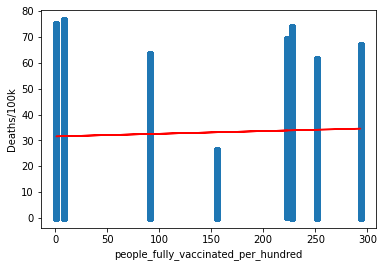

<Figure size 432x288 with 0 Axes>

In [43]:
#   Calculate the correlation coefficient
#   for people_fully_vaccinated_per_hundred and deaths_per100k for selected countries
corr=round(st.pearsonr(analysis_df['Deaths_per_100k'],analysis_df['people_fully_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people fully vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Deaths_per_100k'],analysis_df['people_fully_vaccinated_per_hundred'])

y_values = analysis_df['Deaths_per_100k']*model[0]+model[1]
plt.scatter(analysis_df['Deaths_per_100k'],analysis_df['people_fully_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths_per_100k'],y_values,color="red")
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Deaths/100k')
plt.show()

#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths per 100k.png")

#   the pearson's correlation coefficient 0f 0.04 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people not vaccinated per hundred and deaths is 0.0


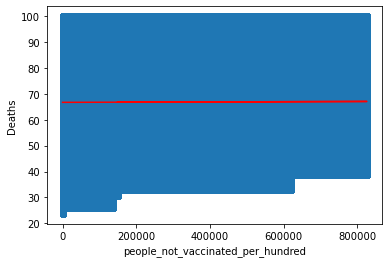

<Figure size 432x288 with 0 Axes>

In [44]:
#   Calculate the correlation coefficient
#   for people_not_vaccinated_per_hundred and deaths for selected countries
corr=round(st.pearsonr(analysis_df['Deaths'],analysis_df['people_not_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people not vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Deaths'],analysis_df['people_not_vaccinated_per_hundred'])

y_values = analysis_df['Deaths']*model[0]+model[1]
plt.scatter(analysis_df['Deaths'],analysis_df['people_not_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths'],y_values,color="red")
plt.xlabel('people_not_vaccinated_per_hundred')
plt.ylabel('Deaths')
plt.show()

#save as a png
plt.savefig("Percentage of People not Vaccinated versus Deaths.png")

#   the pearson's correlation coefficient 0f 0.00 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people not vaccinated per hundred and case fatality ratio is 0.15


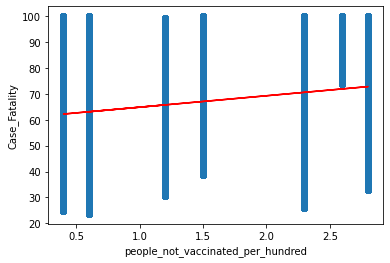

<Figure size 432x288 with 0 Axes>

In [45]:
#   Calculate the correlation coefficient
#   for people_not_vaccinated_per_hundred and case_fatality_ratio for selected countries
corr=round(st.pearsonr(analysis_df['Case_Fatality'],analysis_df['people_not_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people not vaccinated per hundred and case fatality ratio is {corr}")
model = st.linregress(analysis_df['Case_Fatality'],analysis_df['people_not_vaccinated_per_hundred'])

y_values = analysis_df['Case_Fatality']*model[0]+model[1]
plt.scatter(analysis_df['Case_Fatality'],analysis_df['people_not_vaccinated_per_hundred'])
plt.plot(analysis_df['Case_Fatality'],y_values,color="red")
plt.xlabel('people_not_vaccinated_per_hundred')
plt.ylabel('Case_Fatality')
plt.show()

#save as a png
plt.savefig("Percentage of People not Vaccinated versus Case Fatality Ratio.png")

#   the pearson's correlation coefficient 0f 0.15 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people not vaccinated per hundred and deaths per 100k is -0.04


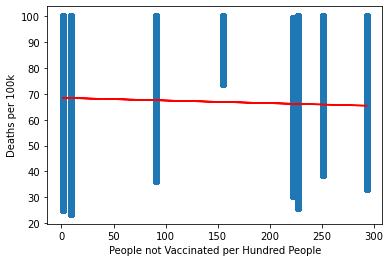

<Figure size 432x288 with 0 Axes>

In [46]:
#   Calculate the correlation coefficient
#   for people_not_vaccinated_per_hundred and deaths_per_100k for selected countries
corr=round(st.pearsonr(analysis_df['Deaths_per_100k'],analysis_df['people_not_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people not vaccinated per hundred and deaths per 100k is {corr}")
model = st.linregress(analysis_df['Deaths_per_100k'],analysis_df['people_not_vaccinated_per_hundred'])

y_values = analysis_df['Deaths_per_100k']*model[0]+model[1]
plt.scatter(analysis_df['Deaths_per_100k'],analysis_df['people_not_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths_per_100k'],y_values,color="red")
plt.xlabel('People not Vaccinated per Hundred People')
plt.ylabel('Deaths per 100k')
plt.show()

#save as a png
plt.savefig("Percentage of People not Vaccinated versus Deaths per 100k.png")

#   the pearson's correlation coefficient 0f -0.04 indicates a negligible level of correlation
#   need  to check the p-value to determine significance